Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

Сформируем датафрейм. Поскольку при чтении данного файла возникает повторная индексация, нужно передать методу именованный аргумент index_col=0.

In [2]:
data = pd.read_csv('../data/DataSet2.csv', index_col=0)

In [3]:
data.head(30)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019","In this early Western, notorious bandit the Ci...",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079","After being convicted of manslaughter, drunk d...",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              571 non-null    object 
 1   Oscar Year                        571 non-null    object 
 2   Film Studio/Producer(s)           571 non-null    object 
 3   Award                             571 non-null    object 
 4   Year of Release                   571 non-null    int64  
 5   Movie Time                        571 non-null    int64  
 6   Movie Genre                       571 non-null    object 
 7   IMDB Rating                       571 non-null    float64
 8   IMDB Votes                        571 non-null    object 
 9   Movie Info                        438 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  339 non-null    object 
 12  Content Ratin

### Первичные выводы

- необходимо выяснить, чем отличаются столбцы Movie Genre и Genres;
- в столбцах с 'Movie Info' до 'Film ID' (не включительно) отсутствуют значения;
- столбец 'Critic Consensus' требует дальнейшего изучения, поскольку в нем много пропущенных значений;
- необходимо перевести названия столбцов в нижний регистр с заменой пробела на '_'</font>

## Обработка пропущенных значений

In [5]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Streaming Release Date              23.292469
Movie Info                          23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Tomatometer Status                  23.117338
Genres                              23.117338
Tomatometer Top Critics Count       23.117338
Content Rating                      23.117338
Tomatometer Fresh Critics Count     23.117338
Tomatometer Rating                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rotten Critics Count    23.117338
Production Company                  23.117338
Film                                 0.000000
Oscar Year                           0.000000
IMDB Votes                        

Рассмотрим, какие наборы значений представляют категориальные признаки:

In [6]:
data['Critic Consensus'].unique()

array(["Subsequent war epics may have borrowed heavily from the original Best Picture winner, but they've all lacked Clara Bow's luminous screen presence and William Wellman's deft direction.",
       nan,
       "The Broadway Melody is interesting as an example of an early Hollywood musical, but otherwise, it's essentially bereft of appeal for modern audiences.",
       'Cimarron is supported by a strong performance from Irene Dunne, but uneven in basically every other regard, and riddled with potentially offensive stereotypes.',
       'Perhaps less a true film than a series of star-studded vignettes, Grand Hotel still remains an entertaining look back at a bygone Hollywood era.',
       'Though solidly acted and pleasant to look at, Cavalcade lacks cohesion, and sacrifices true emotion for mawkishness.',
       'Bubsy Berkeley does it again in 42nd Street, a brilliant depression-era romp with stellar musical numbers and impeccable choreography.',
       'She Done Him Wrong, but putt

In [7]:
data['Audience Status'].unique()

array(['Upright', nan, 'Spilled'], dtype=object)

In [8]:
data['Tomatometer Status'].unique()

array(['Certified-Fresh', nan, 'Rotten', 'Fresh'], dtype=object)

In [9]:
data['Content Rating'].unique()

array(['PG-13', nan, 'NR', 'G', 'PG', 'R'], dtype=object)

In [10]:
data['Movie Genre'].unique()

array(['Drama,Romance,War', 'Drama,Romance', 'Crime,Drama,Film-Noir',
       'Drama,Musical,Romance', 'Action,Crime,Romance', 'Comedy,Music',
       'Western', 'Drama,History,Thriller', 'Drama,War',
       'Crime,Drama,Thriller', 'Biography,Drama,History', 'Romance,Drama',
       'Comedy,Musical,Romance', 'Drama,Western', 'Comedy,Crime,Drama',
       'Comedy,Drama,Family', 'Action,Adventure,Drama', 'Drama',
       'Drama,Sport', 'Crime,Drama', 'Adventure,Drama,Romance',
       'Comedy,Romance,Musical', 'Comedy,Drama,Musical', 'Comedy,Drama',
       'Drama,Family,Romance', 'Biography,Comedy,Drama',
       'Comedy,Drama,History', 'Comedy,Drama,Romance', 'Comedy,Romance',
       'Biography,Drama,Romance', 'Musical,Romance', 'Music,Romance',
       'Comedy,Crime,Mystery', 'Action,Biography,Romance',
       'Adventure,Biography,Drama', 'Action,Adventure,History',
       'Adventure,Drama,War', 'Comedy,Fantasy,Romance',
       'Drama,History,Romance', 'Comedy,Romance,Western',
       'Biograp

In [11]:
data['Genres'].unique()

array(['Action & Adventure, Classics', nan,
       'Musical & Performing Arts, Romance',
       'Action & Adventure, Classics, Western, Romance',
       'Classics, Drama', 'Classics, Drama, Western',
       'Classics, Drama, Romance', 'Classics, Drama, Kids & Family',
       'Musical & Performing Arts', 'Drama, Romance',
       'Classics, Drama, Kids & Family, Romance', 'Classics, Comedy',
       'Classics, Comedy, Romance',
       'Classics, Comedy, Drama, Musical & Performing Arts, Romance',
       'Classics, Comedy, Mystery & Suspense',
       'Action & Adventure, Classics, Drama',
       'Classics, Comedy, Drama, Science Fiction & Fantasy, Romance',
       'Classics, Comedy, Musical & Performing Arts, Romance',
       'Classics, Drama, Musical & Performing Arts, Romance',
       'Classics, Comedy, Musical & Performing Arts',
       'Classics, Drama, Mystery & Suspense',
       'Action & Adventure, Classics, Drama, Mystery & Suspense, Science Fiction & Fantasy',
       'Classics, Co

Заметим, что все строки с каким-либо NaN значением неинформативны по причине отсутствия практически 70% данных, в том числе и большинства числовых.

In [12]:
pd.set_option('display.max_columns', 30)
data[data['Streaming Release Date'].isna()]

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7262b3a8-214d-4205-985c-70e0860f3236
568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d64c669b-7a73-496a-bddb-19cb09264371
569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647357e9-c067-46bd-aaeb-24d4344ec124


Удалим данные строки и посмотрим, как изменилось число NaN значений в каждом столбце:

In [13]:
data = data[data['Streaming Release Date'].isna() == False]
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    22.831050
Audience Status                      0.684932
Authors                              0.456621
Directors                            0.456621
Original Release Date                0.000000
Tomatometer Rotten Critics Count     0.000000
Tomatometer Fresh Critics Count      0.000000
Tomatometer Top Critics Count        0.000000
Audience Count                       0.000000
Audience Rating                      0.000000
Tomatometer Count                    0.000000
Tomatometer Rating                   0.000000
Tomatometer Status                   0.000000
Production Company                   0.000000
Streaming Release Date               0.000000
Film                                 0.000000
Actors                               0.000000
Oscar Year                           0.000000
Content Rating                       0.000000
Genres                               0.000000
Movie Info                           0.000000
IMDB Votes                        

### Предположения для заполнения пропущенного значения:

- Обработать пустые места в Audience Status на основе зависимости от значения в Audience Rating; 
- Заменить на unknown значения в Critic Consensus, Authors, Directors;</font>

#### Первый этап

In [14]:
audience_df = data[['Audience Rating', 'Audience Status']]

audience_df.groupby('Audience Status')['Audience Rating'].min()

Audience Status
Spilled    21.0
Upright    60.0
Name: Audience Rating, dtype: float64

Таким образом, фильм получает статус Upright при зрительской оценке не менее 60 по данному датасету. 

In [15]:
data.loc[data['Audience Rating'] > 60 & data['Audience Status'].isna(), 'Audience Status'] = 'Upright'
data.loc[data['Audience Rating'] < 60 & data['Audience Status'].isna(), 'Audience Status'] = 'Spilled'

In [16]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    22.831050
Authors                              0.456621
Directors                            0.456621
Original Release Date                0.000000
Tomatometer Rotten Critics Count     0.000000
Tomatometer Fresh Critics Count      0.000000
Tomatometer Top Critics Count        0.000000
Audience Count                       0.000000
Audience Rating                      0.000000
Audience Status                      0.000000
Tomatometer Count                    0.000000
Tomatometer Rating                   0.000000
Tomatometer Status                   0.000000
Production Company                   0.000000
Streaming Release Date               0.000000
Film                                 0.000000
Actors                               0.000000
Oscar Year                           0.000000
Content Rating                       0.000000
Genres                               0.000000
Movie Info                           0.000000
IMDB Votes                        

#### Второй этап 

In [17]:
data[['Critic Consensus', 'Authors', 'Directors']] = data[['Critic Consensus', 'Authors', 'Directors']].fillna('unknown')
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Film                                0.0
Actors                              0.0
Tomatometer Rotten Critics Count    0.0
Tomatometer Fresh Critics Count     0.0
Tomatometer Top Critics Count       0.0
Audience Count                      0.0
Audience Rating                     0.0
Audience Status                     0.0
Tomatometer Count                   0.0
Tomatometer Rating                  0.0
Tomatometer Status                  0.0
Production Company                  0.0
Streaming Release Date              0.0
Original Release Date               0.0
Authors                             0.0
Oscar Year                          0.0
Directors                           0.0
Content Rating                      0.0
Critic Consensus                    0.0
Genres                              0.0
Movie Info                          0.0
IMDB Votes                          0.0
IMDB Rating                         0.0
Movie Genre                         0.0
Movie Time                          0.0


##### Заключение

- Недостающие данные были обработаны согласно описанному плану; <font>

## Замена названий столбцов

In [18]:
data = data.rename (
    columns = {
        'Film' : 'film',                               
        'Oscar Year' : 'oscar_year',                    
        'Film Studio/Producer(s)' : 'studio_or_producers',             
        'Award' : 'award',                               
        'Year of Release' : 'year_of_release',                    
        'Movie Time' : 'movie_time',                          
        'Movie Genre' : 'movie_genre',                         
        'IMDB Rating' : 'imdb_rating',                         
        'IMDB Votes' : 'imdb_votes',                          
        'Movie Info' : 'movie_info',                          
        'Genres' : 'genres',                              
        'Critic Consensus' : 'critic_consensus',                    
        'Content Rating' : 'content_rating',                      
        'Directors' : 'directors',                           
        'Authors' : 'authors',                             
        'Actors' : 'actors',                              
        'Original Release Date' : 'original_release_date',               
        'Streaming Release Date' : 'streaming_release_date',              
        'Production Company' : 'production_company',                  
        'Tomatometer Status' : 'tomatometer_status',                  
        'Tomatometer Rating' : 'tomatometer_rating',                  
        'Tomatometer Count' : 'tomatometer_count',                   
        'Audience Status' : 'audience_status',                     
        'Audience Rating' : 'audience_rating',                     
        'Audience Count' : 'audience_count',                      
        'Tomatometer Top Critics Count' : 'tomatometer_top_crit_count',       
        'Tomatometer Fresh Critics Count' : 'tomatometer_fresh_crit_count',     
        'Tomatometer Rotten Critics Count' : 'tomatometer_rotten_crit_count',    
        'Film ID' : 'film_id'                             
    }
)

data

,film,oscar_year,studio_or_producers,award,year_of_release,movie_time,movie_genre,imdb_rating,imdb_votes,movie_info,genres,critic_consensus,content_rating,directors,authors,actors,original_release_date,streaming_release_date,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_crit_count,tomatometer_fresh_crit_count,tomatometer_rotten_crit_count,film_id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Upright,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019","In this early Western, notorious bandit the Ci...","Action & Adventure, Classics, Western, Romance",unknown,NR,"Irving Cummings, Raoul Walsh",Tom Barry,"Warner Baxter, Edmund Lowe, Dorothy Burgess, J...",1928-12-25,2017-03-12,20th Century Fox Film Corporation,Rotten,56.0,9.0,Upright,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079","After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562
13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,"5,851","In 1889, adventurous lawyer and newspaper edit...","Classics, Drama, Western",Cimarron is supported by a strong performance ...,NR,Wesley Ruggles,"Howard Estabrook, Edna Ferber","Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",1931-01-26,2017-01-08,MGM Home Entertainment,Rotten,50.0,24.0,Upright,25.0,1514.0,6.0,12.0,12.0,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",Nominee,2018,136,"Drama,Music,Romance",7.6,"354,157",Seasoned musician Jackson Maine discovers -- a...,Drama,"With appealing leads, deft direction, and an a...",R,Bradley Cooper,"Will Fetters, Eric Roth, Bradley Cooper","Lady Gaga, Bradley Cooper, Sam Elliott, Andrew...",2018-10-05,2019-01-15,Warner Bros. Pictures,Certified-Fresh,90.0,517.0,Upright,79.0,20442.0,62.0,466.0,52.0,a8a00610-8b95-4d5f-b95e-128b6a2853ea
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",Nominee,2018,132,"Biography,Comdey,Drama",7.2,"132,014",Gov. George W. Bush of Texas picks Dick Cheney...,Drama,"Vice takes scattershot aim at its targets, but...",R,Adam McKay,Adam McKay,"Christian Bale, Amy Adams, Steve Carell, Sam R...",2018-12-25,2019-03-12,Annapurna Pictures,Fresh,65.0,359.0,Upright,60.0,5061.0,47.0,234.0,125.0,27048415-ff2e-427e-a4de-5d2898a0812d
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,"349,303","In the 1950s, truck driver Frank Sheeran gets ...","Drama, Mystery & Suspense",An epic gangster drama that earns its extended...,R,Martin Scorsese,Steven Zaillian,"Robert De Niro, 

## Исправление типов данных

### Неправильные типы данных

- тип данных столбцов Year of Release, IMDB Votes, Tomatometer Count, Audience Count, Tomatometer Top Critics Count, Tomatometer Fresh Critics Count, Tomatometer Rotten Critics Count необходимо перевести в int;
- тип данных Original Release Date, Streaming Release Date нужно перевести в datetime; </font>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 561
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   film                           438 non-null    object 
 1   oscar_year                     438 non-null    object 
 2   studio_or_producers            438 non-null    object 
 3   award                          438 non-null    object 
 4   year_of_release                438 non-null    int64  
 5   movie_time                     438 non-null    int64  
 6   movie_genre                    438 non-null    object 
 7   imdb_rating                    438 non-null    float64
 8   imdb_votes                     438 non-null    object 
 9   movie_info                     438 non-null    object 
 10  genres                         438 non-null    object 
 11  critic_consensus               438 non-null    object 
 12  content_rating                 438 non-null    object 


Переведем даты релиза и стриминга в DateTime

In [20]:
data ['original_release_date'] = pd.to_datetime(data['original_release_date'], format = '%Y-%m-%d')    
data ['streaming_release_date'] = pd.to_datetime(data['streaming_release_date'], format = '%Y-%m-%d') 

Переведем количественные данные в int. Заметим, что число голосов в imdb_votes имеет некорректный формат (содержит запятые). Предварительно удалим их:

In [21]:
deleter = lambda x: x.replace(',', '')
data['imdb_votes'] = data['imdb_votes'].apply(deleter)

In [22]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['imdb_votes'] = data['imdb_votes'].astype(int)
data['tomatometer_count'] = data['tomatometer_count'].astype(int)
data['audience_count'] = data['audience_count'].astype(int)
data['tomatometer_top_crit_count'] = data['tomatometer_top_crit_count'].astype(int)
data['tomatometer_fresh_crit_count'] = data['tomatometer_fresh_crit_count'].astype(int)
data['tomatometer_rotten_crit_count'] = data['tomatometer_rotten_crit_count'].astype(int)

In [23]:
data

,film,oscar_year,studio_or_producers,award,year_of_release,movie_time,movie_genre,imdb_rating,imdb_votes,movie_info,genres,critic_consensus,content_rating,directors,authors,actors,original_release_date,streaming_release_date,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_crit_count,tomatometer_fresh_crit_count,tomatometer_rotten_crit_count,film_id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46,Upright,78.0,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24,Upright,21.0,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...","Action & Adventure, Classics, Western, Romance",unknown,NR,"Irving Cummings, Raoul Walsh",Tom Barry,"Warner Baxter, Edmund Lowe, Dorothy Burgess, J...",1928-12-25,2017-03-12,20th Century Fox Film Corporation,Rotten,56.0,9,Upright,38.0,356,2,5,4,a0644f19-a136-44c2-ab5d-50978ef19608
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75.0,8,Upright,69.0,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562
13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...","Classics, Drama, Western",Cimarron is supported by a strong performance ...,NR,Wesley Ruggles,"Howard Estabrook, Edna Ferber","Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",1931-01-26,2017-01-08,MGM Home Entertainment,Rotten,50.0,24,Upright,25.0,1514,6,12,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",Nominee,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,Drama,"With appealing leads, deft direction, and an a...",R,Bradley Cooper,"Will Fetters, Eric Roth, Bradley Cooper","Lady Gaga, Bradley Cooper, Sam Elliott, Andrew...",2018-10-05,2019-01-15,Warner Bros. Pictures,Certified-Fresh,90.0,517,Upright,79.0,20442,62,466,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",Nominee,2018,132,"Biography,Comdey,Drama",7.2,132014,Gov. George W. Bush of Texas picks Dick Cheney...,Drama,"Vice takes scattershot aim at its targets, but...",R,Adam McKay,Adam McKay,"Christian Bale, Amy Adams, Steve Carell, Sam R...",2018-12-25,2019-03-12,Annapurna Pictures,Fresh,65.0,359,Upright,60.0,5061,47,234,125,27048415-ff2e-427e-a4de-5d2898a0812d
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,349303,"In the 1950s, truck driver Frank Sheeran gets ...","Drama, Mystery & Suspense",An epic gangster drama that earns its extended...,R,Martin Scorsese,Steven Zaillian,"Robert De Niro, Al Pacino, Joe Pesci, Jesse Pl...",2019-11-01,2019-11-27,Netflix,Certified-Fresh,96.0,439,Upri

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 561
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   film                           438 non-null    object        
 1   oscar_year                     438 non-null    object        
 2   studio_or_producers            438 non-null    object        
 3   award                          438 non-null    object        
 4   year_of_release                438 non-null    int32         
 5   movie_time                     438 non-null    int64         
 6   movie_genre                    438 non-null    object        
 7   imdb_rating                    438 non-null    float64       
 8   imdb_votes                     438 non-null    int32         
 9   movie_info                     438 non-null    object        
 10  genres                         438 non-null    object        
 11  critic_consensus        

In [25]:
data['award'].unique()

array(['Winner', 'Nominee'], dtype=object)

Заменим статусы на числовые эквиваленты

- audience_status: Spilled : 0, Upright: 1
- tomatometer_status: Rotten: 0, Fresh: 1, Certified-Fresh: 2
- award: Winner: 1, Nominee: 0

In [26]:
dict_status = {'Spilled': 0,
             'Upright': 1}

data['audience_status'] = data['audience_status'].map(dict_status)

dict_status = {'Rotten': 0,
             'Fresh': 1,
              'Certified-Fresh': 2}

data['tomatometer_status'] = data['tomatometer_status'].map(dict_status)

dict_status = {'Winner': 1,
             'Nominee': 0}

data['award'] = data['award'].map(dict_status)

## Обогащение данных

Поскольку исследованию подлежит достаточно большое множество данных, попробуем уменьшить его размерность путем трансформации некоторых характеристик в одну, а именно:

- average_count = (imdb_votes + audience_count)/2
- average_rating = (imdb_rating + audience_rating)/2

Рейтинг и соответственно число голосов Rotten Tomatoes не учитывается, поскольку они принадлежат кинокритикам, а не зрителям. Соответственно их мнение зачастую имеет большую ценность, следовательно не приравнивается к отзыву обычного (в рамках киноиндустрии) человека.

In [27]:
data['average_count'] = data[['imdb_votes', 'audience_count']].mean(axis = 1)
data['average_rating'] = data[['imdb_rating', 'audience_rating']].mean(axis = 1)

data

,film,oscar_year,studio_or_producers,award,year_of_release,movie_time,movie_genre,imdb_rating,imdb_votes,movie_info,genres,critic_consensus,content_rating,directors,authors,...,original_release_date,streaming_release_date,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_crit_count,tomatometer_fresh_crit_count,tomatometer_rotten_crit_count,film_id,average_count,average_rating
0,Wings,1927/28,Famous Players-Lasky,1,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton",...,1927-08-12,2017-01-02,Unknown,2,93.0,46,1,78.0,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067,7875.5,42.75
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,1,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason",...,1929-02-01,2017-02-25,MGM Home Entertainment,0,33.0,24,1,21.0,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236,4351.5,13.35
6,In Old Arizona,1928/29,Fox,0,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...","Action & Adventure, Classics, Western, Romance",unknown,NR,"Irving Cummings, Raoul Walsh",Tom Barry,...,1928-12-25,2017-03-12,20th Century Fox Film Corporation,0,56.0,9,1,38.0,356,2,5,4,a0644f19-a136-44c2-ab5d-50978ef19608,687.5,21.80
9,The Big House,1929/30,Cosmopolitan,0,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...",...,1930-05-14,2012-04-16,Warner Bros.,1,75.0,8,1,69.0,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562,1201.0,38.05
13,Cimarron,1930/31,RKO Radio,1,1931,123,"Drama,Western",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...","Classics, Drama, Western",Cimarron is supported by a strong performance ...,NR,Wesley Ruggles,"Howard Estabrook, Edna Ferber",...,1931-01-26,2017-01-08,MGM Home Entertainment,0,50.0,24,1,25.0,1514,6,12,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9,3682.5,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",0,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,Drama,"With appealing leads, deft direction, and an a...",R,Bradley Cooper,"Will Fetters, Eric Roth, Bradley Cooper",...,2018-10-05,2019-01-15,Warner Bros. Pictures,2,90.0,517,1,79.0,20442,62,466,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea,187299.5,43.30
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",0,2018,132,"Biography,Comdey,Drama",7.2,132014,Gov. George W. Bush of Texas picks Dick Cheney...,Drama,"Vice takes scattershot aim at its targets, but...",R,Adam McKay,Adam McKay,...,2018-12-25,2019-03-12,Annapurna Pictures,1,65.0,359,1,60.0,5061,47,234,125,27048415-ff2e-427e-a4de-5d2898a0812d,68537.5,33.60
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",0,2019,209,"Biography,Crime,Drama",7.8,349303,"In the 1950s, truck driver Frank Sheeran gets ...","Drama, Mystery & Suspense",An epic gangster drama that earns its extended...,R,Martin Scorsese,Steven Zaillian,...,2019-11-01,2019-11-27,Netflix,2,96.0,439,1,86.0,1057,53,421,19,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d,175180.0,46.90
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",0,2019,122,"Crime,Drama,Thriller",8.4,1056051,"Forever alone in a crowd, failed comedian Arth...","Action & Adventure, Drama, Mystery & Suspense",Joker gives its infamous central character a c...,R,Todd Phillips,"Todd Phillips, Scott Silver",...,2019-10-04,2019-10-03,Warn

## EDA

#### Выделим основные характеристики фильмов:
Параметры
:
- Год выпуск;р
- Длительност;ь
-Средний рейтинг;B
-Среднее количество оценок;
- Рейтинг на Rotten Tomatoes;е

Выведем тепловую карту

<Axes: >

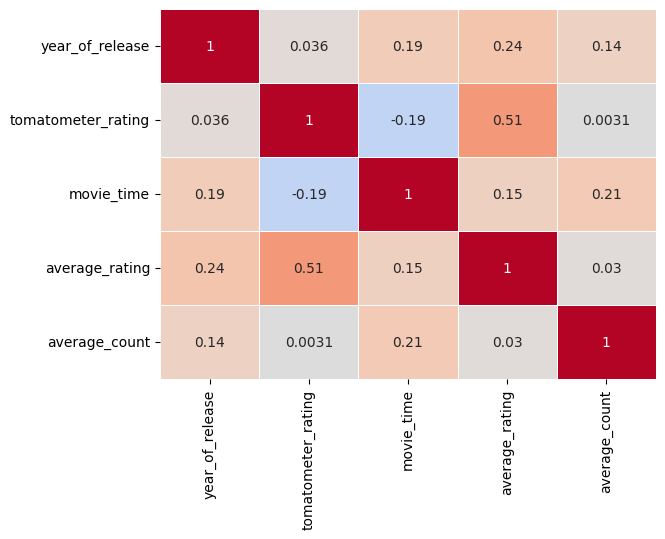

In [28]:
sns.heatmap(data[['year_of_release','tomatometer_rating','movie_time','average_rating','average_count']].corr(), cmap= 'coolwarm', linewidths=.5, annot=True, cbar = False, vmin=-1, vmax=1, center= 0) 

Теперь этой картой можно пользоваться для дальнейшего выявления зависимостей. 

Выведем гистограммы для визуальной оценки 

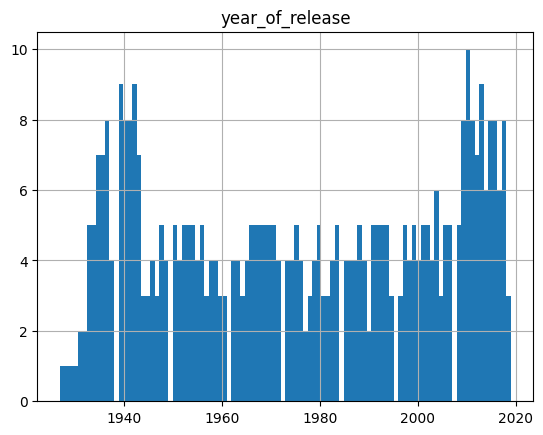

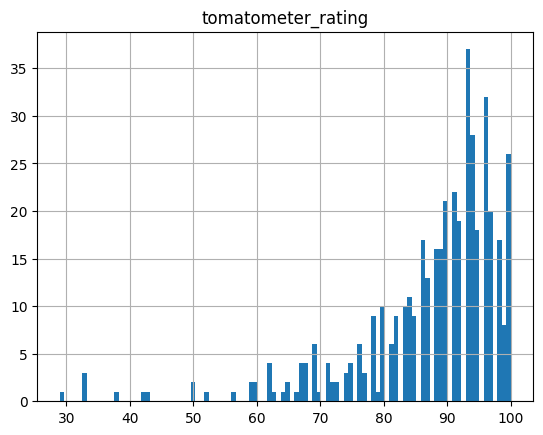

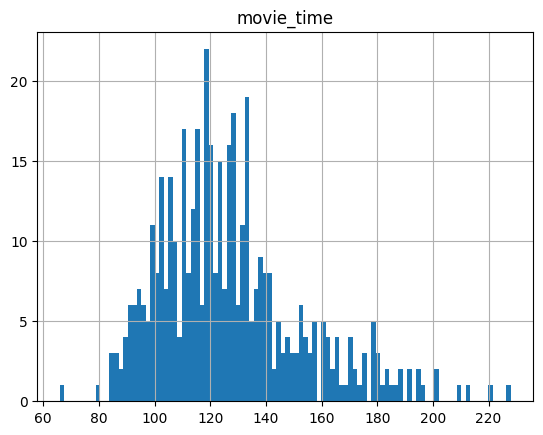

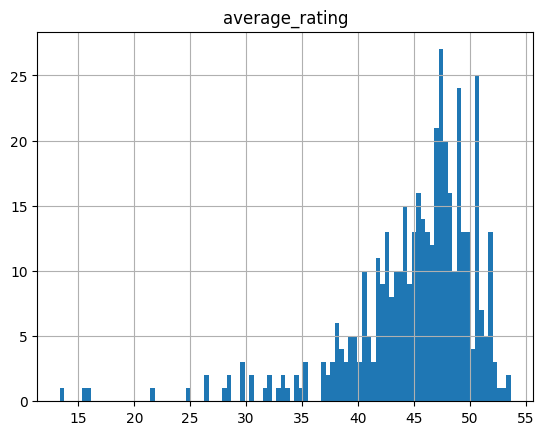

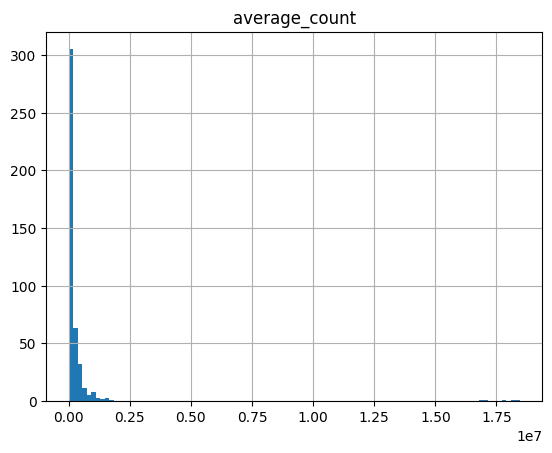

In [29]:
columns = ['year_of_release','tomatometer_rating','movie_time','average_rating','average_count']

for column in columns:
    data.hist(column, bins = 100)

Отсюда можно сделать вывод, что выбросы в average_count и average_rating затрудняют чтение соответствующих данных. 

### Удаление выбросов

Воспользуемся методом межквартильного размаха для удаления выбросов в отмеченных столбцах:

In [30]:
outlier =  data[['average_rating','average_count']]
Q1 = outlier.quantile(q=0.25)
Q3 = outlier.quantile(q=0.75)
IQR = Q3 - Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]

Выведем обработанные данные 

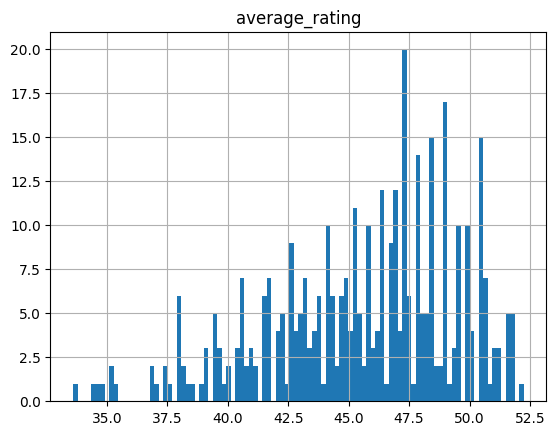

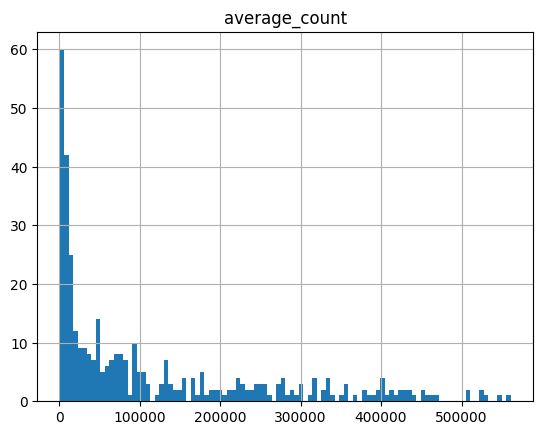

In [32]:
columns = ['average_rating','average_count']

for column in columns:
    data_filtered.hist(column, bins = 100)

Теперь данные распределены по всему диапазону значений, что упростит анализ.

### 

### Среднее число голосов за каждый возрастной рейтинг

In [33]:
data_filtered['content_rating'].unique()

array(['PG-13', 'NR', 'G', 'PG', 'R'], dtype=object)

In [34]:
avg_votes_by_cr = data_filtered.pivot_table(index='content_rating', values='average_count', aggfunc='mean')
avg_votes_by_cr.sort_values(ascending=False ,by='average_count')
avg_votes_by_cr

,average_count
content_rating,
G,58451.560976
NR,16522.172043
PG,86864.457746
PG-13,211029.631579
R,191608.427966


Выберем два наиболее популярных по количеству зрительских голосов рейтинга - PG-13 и R

In [35]:
pg_13 = data_filtered.query('content_rating == "PG-13"')
r = data_filtered.query('content_rating == "R"')

In [36]:
pg_13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 549
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   film                           57 non-null     object        
 1   oscar_year                     57 non-null     object        
 2   studio_or_producers            57 non-null     object        
 3   award                          57 non-null     int64         
 4   year_of_release                57 non-null     int32         
 5   movie_time                     57 non-null     int64         
 6   movie_genre                    57 non-null     object        
 7   imdb_rating                    57 non-null     float64       
 8   imdb_votes                     57 non-null     int32         
 9   movie_info                     57 non-null     object        
 10  genres                         57 non-null     object        
 11  critic_consensus         

In [37]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 95 to 561
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   film                           118 non-null    object        
 1   oscar_year                     118 non-null    object        
 2   studio_or_producers            118 non-null    object        
 3   award                          118 non-null    int64         
 4   year_of_release                118 non-null    int32         
 5   movie_time                     118 non-null    int64         
 6   movie_genre                    118 non-null    object        
 7   imdb_rating                    118 non-null    float64       
 8   imdb_votes                     118 non-null    int32         
 9   movie_info                     118 non-null    object        
 10  genres                         118 non-null    object        
 11  critic_consensus       

### Анализ влияния на рейтинг Rotten Tomatoes остальных факторов

Поскольку данный сайт явлется в определенной степени авторитетным источником, его оценка может повлиять на общее отношение к фильму, его популярности спустя года и возможно даже сборы. Попробуем исследовать взаимосвязь с годом выпуска фильма (возможно, более старые фильмы оценивают выше нынешних) и средним зрительский рейтингом, ориентируясь на выведенный ранее heatmap.

#### Проверим, как изменяется рейтинг в зависимости от года выпуска фильма

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'pg_13')

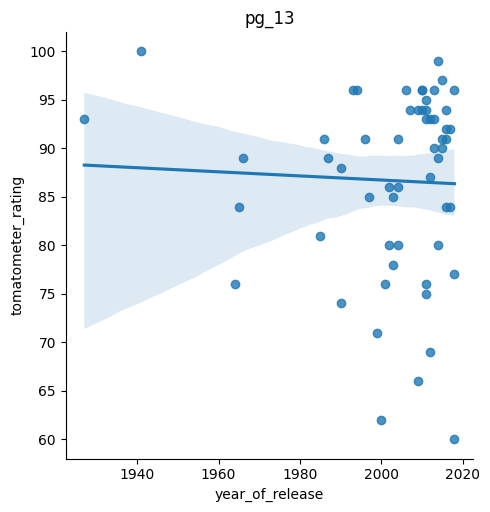

In [38]:
sns.lmplot(x='year_of_release',y='tomatometer_rating', data=pg_13)
plt.title('pg_13')

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'r')

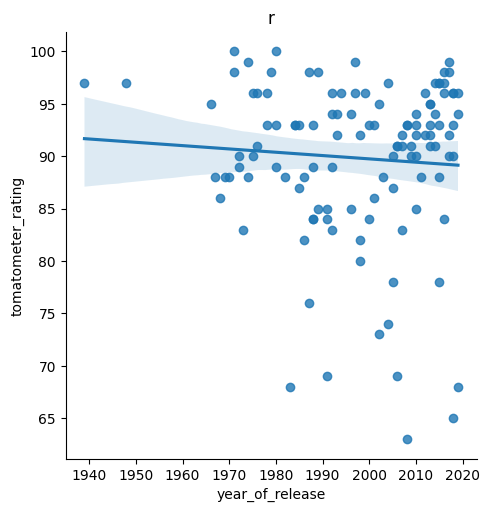

In [39]:
sns.lmplot(x='year_of_release',y='tomatometer_rating', data=r)
plt.title('r')

Отсюда видно, что год/период выпуска в целом не оказывает значимое влияение на рейтинг критиков для обоих рейтингов, хоть небольшое падение и видно на графике. Это означает, что качество фильмов с их точки зрения немного уменьшается с годами. 

#### Проверим, как изменяется рейтинг в зависимости от зрительского рейтинга фильма 

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'pg_13')

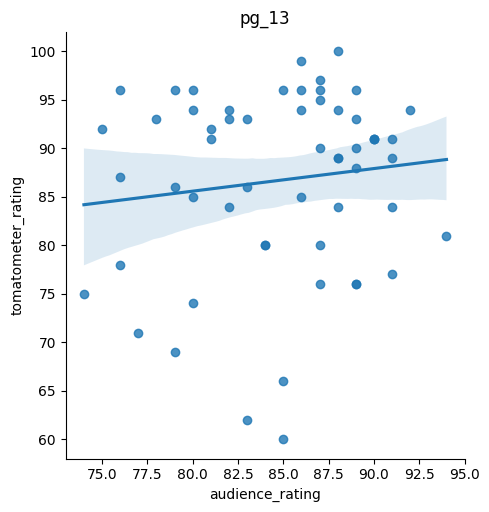

In [40]:
sns.lmplot(x='audience_rating',y='tomatometer_rating', data=pg_13)
plt.title('pg_13')

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'r')

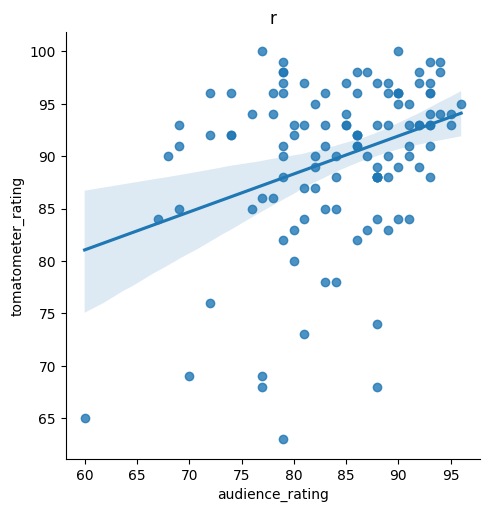

In [41]:
sns.lmplot(x='audience_rating',y='tomatometer_rating', data=r)
plt.title('r')

Из графика видно, что с ростом рейтинга аудитории растет и рейтинг критиков в обоих случаях. 

- для PG-13 график имеет небольшой уклон, что означает малую зависимость мнения критиков от мнения людей касательно фильмой данной категории. Это может говорить о том, что в силу развлекательного уклона фильмов люди могут подходить к оценке куда менее серьезно, чем критики. Особенно, если просмотр проходит вместе с детьми.
- для R график имеет крутой уклон, рейтинг критиков растет вместе с рейтингом аудитории. Здесь налицо противоположный подход. Фильмы в этой категории зачастую куда более серьезны, драматичны, глубоки, что провоцируют подойти к оценке более основательно.

#### Проверим, как изменяется рейтинг фильма в зависимости от количества зрительских голосов

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'pg_13')

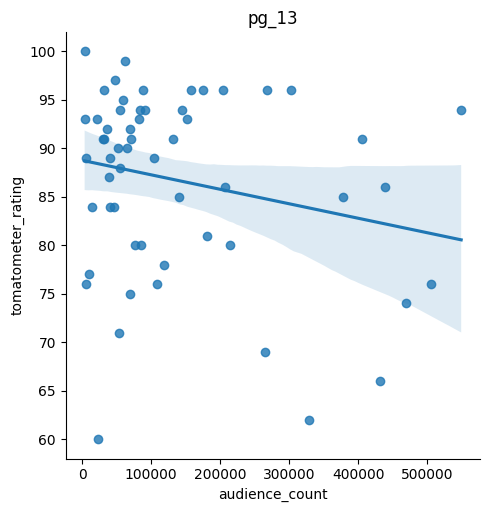

In [42]:
sns.lmplot(x='audience_count',y='tomatometer_rating', data=pg_13)
plt.title('pg_13')

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'r')

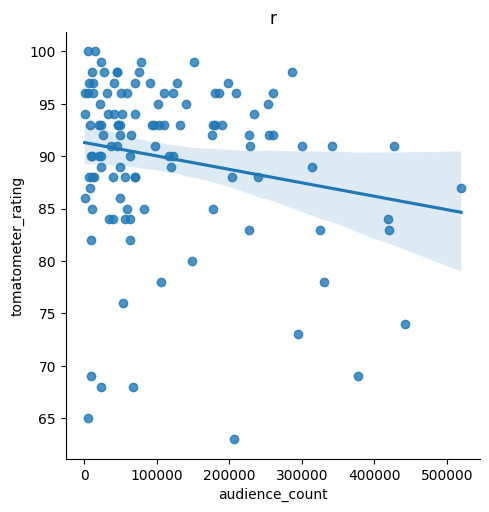

In [43]:
sns.lmplot(x='audience_count',y='tomatometer_rating', data=r)
plt.title('r')

В обоих случаях рейтинг уменьшается с ростом числа зрительских оценок. Это показывает, что чем популярнее фильм, тем менее высокий рейтинг он получает. 

#### Проверим, как изменяется рейтинг фильма в зависимости от длительности

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'pg_13')

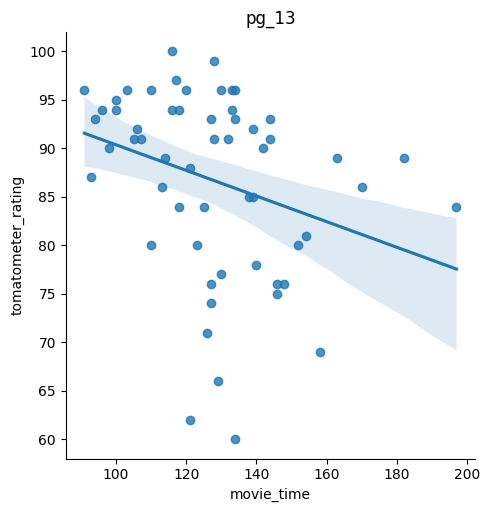

In [44]:
sns.lmplot(x='movie_time',y='tomatometer_rating', data=pg_13)
plt.title('pg_13')

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'r')

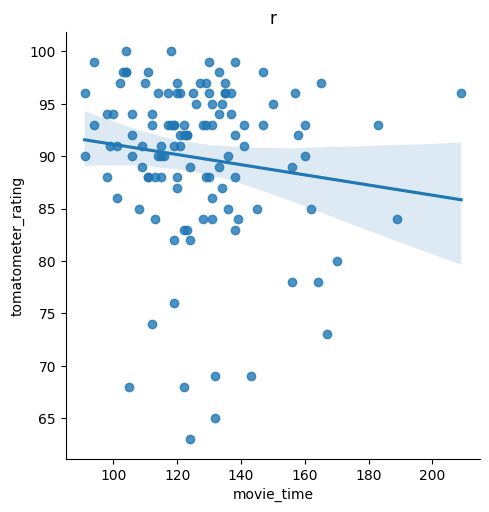

In [45]:
sns.lmplot(x='movie_time',y='tomatometer_rating', data=r)
plt.title('r')

Из графиков видно, что

- Длительность сильно влияет на оценку фильмов с рейтингом PG-13: с ее ростом ощутимо уменьшается рейтинг критиков
- Похожая ситуация и с R, однако зависимость выражена значительно меньше.

#### Выводы

- Оценки критиков практически не зависят от временного промежутка, в который фильм вышел в прокат 
- Оценки критиков для PG-13 мало зависят от зрительского рейтинга и растут вместе с ним для R
- Чем популярнее фильм, тем менее высокий рейтинг он получает
- Рост длительности негативно сказывается на рейтинге в обоих случаях, однако сильно выраженно это только для PG-13

## Заключение

Были удалены строки, содержащие хотя бы одно NaN значение, поскольку все они характеризовались отсутствием 70% данных. 


Запоены ь пропущенные значеяы):- Обработаны пустые места в Audience Status на основе зависимости от значения в Audience Rating
- Заменены на unknown значения в Critic Consensus, Authors, Directorsлей, поэтому цену ТС необходимо снизить до уровня ниже средней.

### Изменение типа данных

- тип данных столбцов Year of Release, IMDB Votes, Tomatometer Count, Audience Count, Tomatometer Top Critics Count, Tomatometer Fresh Critics Count, Tomatometer Rotten Critics Count переведены в int
- тип данных Original Release Date, Streaming Release Date переведены в datetime

### Редактирование данных

- Были введены столбцы со средней зрительской оценкой и средним количеством голосов по imdb и audience.

### Проверка выбросов

- Выбросы параметров: average_count и average_rating.

### Удаление выбросов

- Сравнение фреймов с выбросами и без показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов.

### Изучение рейтинга Tomatometer для PG-13 и R

- Факторы, влияющие на рейтинг: год релиза, длительность, средний зрительский рейтинг, среднее число зрительских голосов.
- Все данные используют метод диаграммы рассеяния.
- Результат:

#### Год релиза

- Год/период выпуска в целом не оказывает значимое влияение на рейтинг критиков для обоих рейтингов, хоть небольшое падение и видно. Это означает, что качество фильмов с их точки зрения немного уменьшается с годами. 

#### Длительность

- Длительность сильно влияет на оценку фильмов с рейтингом PG-13: с ее ростом ощутимо уменьшается рейтинг критиков
- Похожая ситуация и с R, однако зависимость выражена значительно меньше.

#### Средний зрительский рейтинг

- для PG-13 характерна малая зависимость мнения критиков от мнения людей касательно фильмой данной категории. Это может говорить о том, что в силу развлекательного уклона фильмов люди могут подходить к оценке куда менее серьезно, чем критики. Особенно, если просмотр проходит вместе с детьми.
- для R рейтинг критиков растет вместе с рейтингом аудитории. Здесь налицо противоположный подход. Фильмы в этой категории зачастую куда более серьезны, драматичны, глубоки, что провоцируют подойти к оценке более основательно.


#### Среднее число зрительских голосов

В обоих случаях рейтинг уменьшается с ростом числа зрительских оценок. Это показывает, что чем популярнее фильм, тем менее высокий рейтинг он получает.